In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

In [43]:
# Load dataset
df = pd.read_csv("https://gist.githubusercontent.com/pravalliyaram/5c05f43d2351249927b8a3f3cc3e5ecf/raw/8bd6144a87988213693754baaa13fb204933282d/Mall_Customers.csv")

In [44]:
# Select relevant features for clustering
features = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [45]:
# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

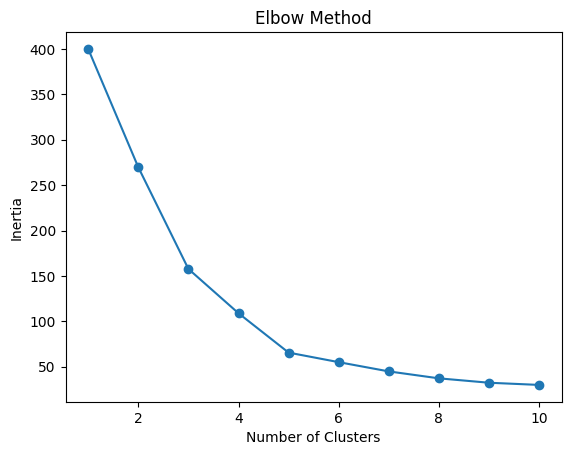

In [46]:
# Determine optimal clusters using Elbow Method
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [47]:
# Apply K-Means with optimal K
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df['KMeans_Cluster'] = kmeans.fit_predict(scaled_features)

In [48]:
# Apply DBSCAN
neigh = NearestNeighbors(n_neighbors=5)
neigh.fit(scaled_features)
distances, _ = neigh.kneighbors(scaled_features)

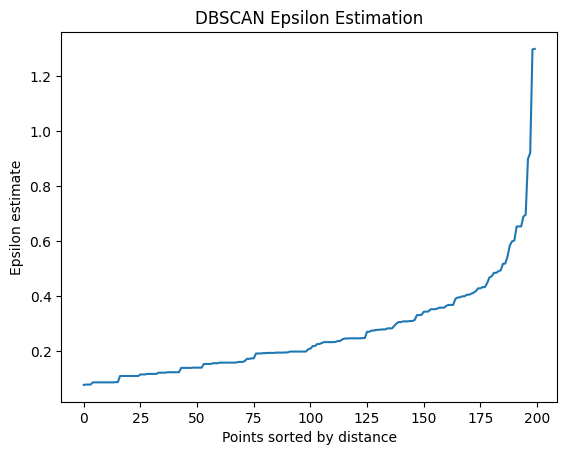

In [49]:
# Estimate optimal epsilon
distances = np.sort(distances[:, -1])
plt.plot(distances)
plt.xlabel('Points sorted by distance')
plt.ylabel('Epsilon estimate')
plt.title('DBSCAN Epsilon Estimation')
plt.show()

In [50]:
# Set DBSCAN parameters
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(scaled_features)

In [51]:
# Analyze clusters
print("K-Means Cluster Means:\n", df.groupby('KMeans_Cluster').mean(numeric_only=True))
print("DBSCAN Cluster Counts:\n", df['DBSCAN_Cluster'].value_counts())

K-Means Cluster Means:
                 CustomerID        Age  Annual Income (k$)  \
KMeans_Cluster                                              
0                86.320988  42.716049           55.296296   
1               162.000000  32.692308           86.538462   
2                23.090909  25.272727           25.727273   
3               164.371429  41.114286           88.200000   
4                23.000000  45.217391           26.304348   

                Spending Score (1-100)  DBSCAN_Cluster  
KMeans_Cluster                                          
0                            49.518519        0.000000  
1                            82.128205        0.794872  
2                            79.363636        0.000000  
3                            17.114286       -0.114286  
4                            20.913043        0.000000  
DBSCAN Cluster Counts:
 DBSCAN_Cluster
 0    157
 1     35
-1      8
Name: count, dtype: int64


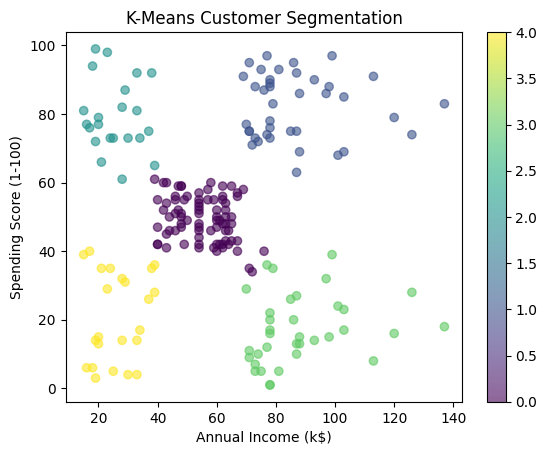

In [52]:
# Visualize K-Means Clusters
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['KMeans_Cluster'], cmap='viridis', alpha=0.6)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-Means Customer Segmentation')
plt.colorbar()
plt.show()

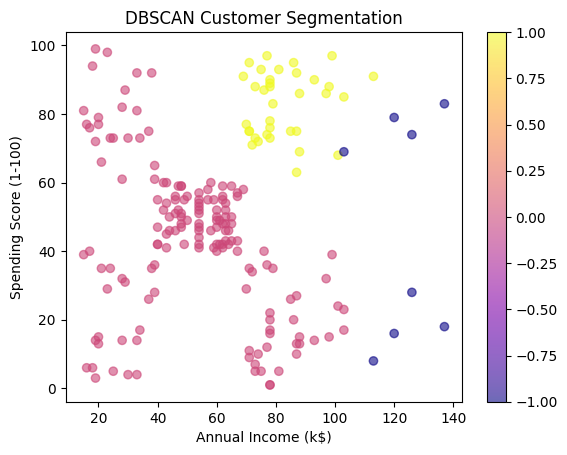

In [53]:
# Visualize DBSCAN Clusters
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['DBSCAN_Cluster'], cmap='plasma', alpha=0.6)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('DBSCAN Customer Segmentation')
plt.colorbar()
plt.show()